# Twitter Sentiment Analyses
Sentiment Analysis is a technique used in text mining. It may, therefore, be described as a text mining technique for analyzing the underlying sentiment of a text message, i.e., a tweet. Twitter sentiment or opinion expressed through it may be positive, negative or neutral. However, no algorithm can give you 100% accuracy or prediction on sentiment analysis.
As a part of Natural Language Processing, algorithms like Logidtic Regression, SVM, Random Forest, and  Naive Bayes is used in predicting the polarity of the sentence. sentiment analysis of Twitter data may also depend upon sentence level and document level.

- Import DataSets
- Text Preprocessing 
- Visualization
- Machine Learning Algorithm
- Accuracy and F1-Score
- conclusion

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import nltk
import re 
import string

In [4]:
# Facht the dataset 
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter/test.csv")

In [5]:
# Let's See dataset
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
# Check training data -> how many +ve and -ve tweets
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


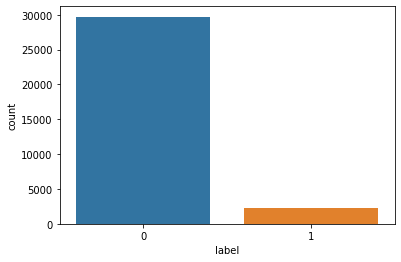

In [7]:
#Let's Visualize the +ve and -ve tweets
sns.countplot(train_data['label'])

In [8]:
# Lest's check +ve twees once
train_data[train_data['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [9]:
# Let's check shape of our train data
train_data.shape

(31962, 3)

In [10]:
# Now Let's combine the dataset to make single main datasets
whole_datasets = train_data.append(test_data,ignore_index=True)  #train and test dataset are combined
whole_datasets.shape

(49159, 3)

In [11]:
whole_datasets.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


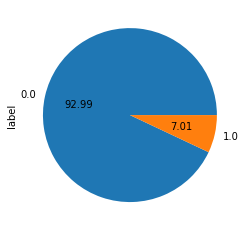

In [12]:
#let's visualisze the whole data sets
whole_datasets['label'].value_counts().plot(kind='pie', autopct='%.2f')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


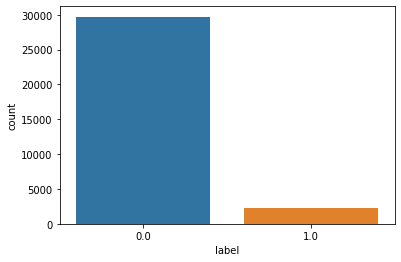

In [13]:
sns.countplot(whole_datasets['label'])

# Text Preprocessing 
- <b> Regulat Expression</b>
- <b> Stop Word Removal</b>
- <b> Tokenization</b>
- <b> Stemming</b>
- <b> Final Text Preprocessing Model</b>

In [14]:
whole_datasets['clean_tweet'] = whole_datasets['tweet']
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Regular Expressions

In [15]:
# Now remove the @tag or twitter handle
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for pattern in r:
        input_text = re.sub(pattern, '', input_text)
    return input_text

In [16]:
whole_datasets['clean_tweet'] = np.vectorize(remove_pattern)(whole_datasets['clean_tweet'],"@[\w]*")

In [17]:
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
whole_datasets['clean_tweet'] =whole_datasets['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [19]:
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [20]:
whole_datasets['clean_tweet'] =whole_datasets['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [21]:
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Tokenization of the clean_tweet

In [22]:
tokenize_tweet = whole_datasets['clean_tweet'].apply(lambda x:x.split()) #it will spilt in the form of word
tokenize_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: clean_tweet, dtype: object

## Apply Stemming

In [23]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokenize_tweet = tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [24]:
tokenize_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: clean_tweet, dtype: object

In [25]:
# Now Recreate the clean_tweet by combining tokenize_tweet
for i in range (len(tokenize_tweet)):
    tokenize_tweet[i] = ' '.join(tokenize_tweet[i]) #Concatinate th all words 

#After concatination just copied in clean_tweet
whole_datasets['clean_tweet'] = tokenize_tweet

## Final Tweets after Text Preprocessing

In [26]:
whole_datasets.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here


# See WordCloud (Postive, Negative)
- <b> Visualize the all Words</b>
- <b> Visualize the Postive Words (label =0)</b>
- <b> Visualize the Negative Words (label =1)</b>

## Visualize the all Words

In [27]:
!pip install wordcloud

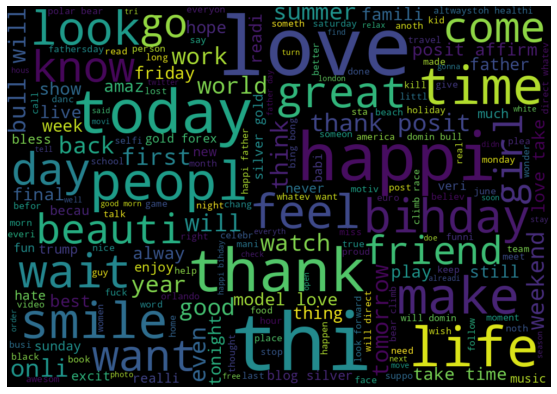

In [28]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in whole_datasets['clean_tweet']])
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000,height=700,random_state=25,max_font_size=150).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Visualize the Postive Words 

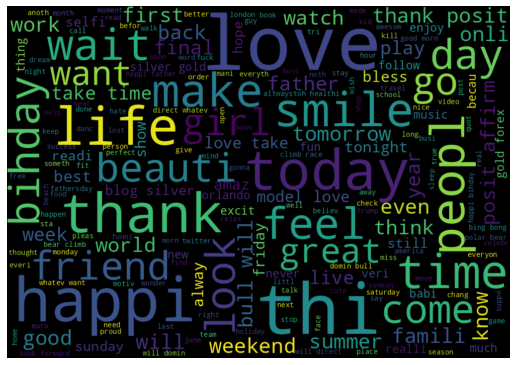

In [29]:
from wordcloud import WordCloud
postive_word = ' '.join([word for word in whole_datasets['clean_tweet'][whole_datasets['label']==0]])
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000,height=700,random_state=25,max_font_size=150).generate(postive_word)
plt.figure(figsize=(9,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Visualize the Negative Words 

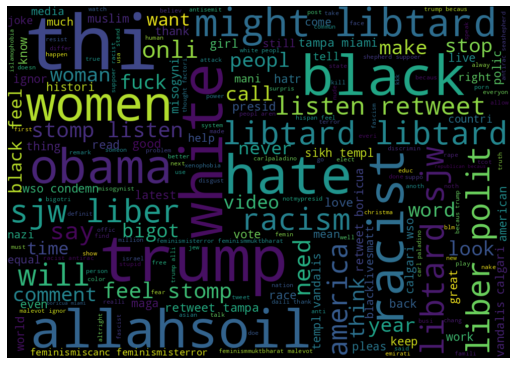

In [30]:
from wordcloud import WordCloud
negative_words = ' '.join([word for word in whole_datasets['clean_tweet'][whole_datasets['label']==1]])
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000,height=700,random_state=25,max_font_size=150).generate(negative_words)
plt.figure(figsize=(9,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Extracting the Hash Tag (#)
- Count and Visualize the postive Hash Tag words
- Count and Visualize the Negative Hash Tag words

In [31]:
# Collect the Hash Tag
def extrac_hashtag(input):
    hashtag = []
    for i in input:
        ht = re.findall(r"#(\w+)",i)
        hashtag.append(ht)
    return hashtag

In [32]:
pos_hashtag = extrac_hashtag(whole_datasets['clean_tweet'][whole_datasets['label']==0])
pos_hashtag = sum(pos_hashtag,[])

In [33]:
neg_hashtag = extrac_hashtag(whole_datasets['clean_tweet'][whole_datasets['label']==1])
neg_hashtag = sum(neg_hashtag,[])


## Count and Visualize the postive Hash Tag words

In [34]:
# Create the Freq.. table like <Key,value> Pair with nltk libtrary
pos_hashtag_word = nltk.FreqDist(pos_hashtag)
pos_hashtag_word

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'posit': 917,
       

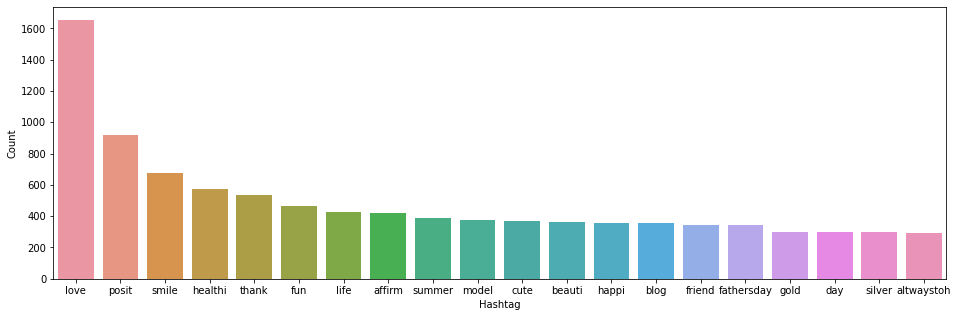

In [35]:
#Let's Visualize the # postive word
pos_dataFrame = pd.DataFrame({'Hashtag': list(pos_hashtag_word.keys()),'Count':list(pos_hashtag_word.values())})

#selecting top 20 most frequent hashtags
pos_dataFrame = pos_dataFrame.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=pos_dataFrame, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

## Count and Visualize the Negative Hash Tag words

In [36]:
# Create the Freq.. table like <Key,value> Pair with nltk libtrary
neg_hashtag_word = nltk.FreqDist(neg_hashtag)
neg_hashtag_word

FreqDist({'cnn': 10,
          'michigan': 2,
          'tcot': 14,
          'australia': 6,
          'opkillingbay': 5,
          'seashepherd': 22,
          'helpcovedolphin': 3,
          'thecov': 4,
          'neverump': 8,
          'xenophobia': 12,
          'love': 11,
          'peac': 8,
          'race': 14,
          'ident': 1,
          'med': 1,
          'altright': 18,
          'whitesupremaci': 6,
          'linguist': 1,
          'power': 2,
          'raciolinguist': 1,
          'brexit': 27,
          'peopl': 11,
          'trump': 136,
          'republican': 13,
          'michelleobama': 8,
          'knick': 1,
          'golf': 1,
          'jewishsupremacist': 1,
          'libtard': 77,
          'sjw': 75,
          'liber': 81,
          'polit': 95,
          'trash': 1,
          'hate': 37,
          'stereotyp': 4,
          'prejudic': 3,
          'hope': 5,
          'conflict': 1,
          'pol': 1,
          'bluelivesmatt': 3,
          

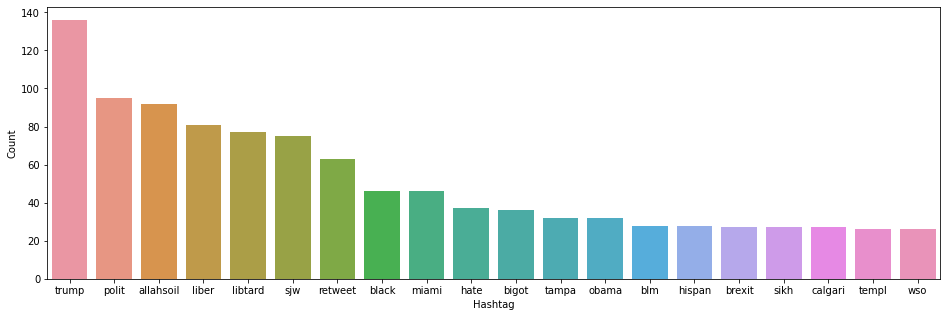

In [37]:
#Let's Visualize the # postive word
neg_dataFrame = pd.DataFrame({'Hashtag': list(neg_hashtag_word.keys()),'Count':list(neg_hashtag_word.values())})

#selecting top 20 most frequent hashtags
neg_dataFrame = neg_dataFrame.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=neg_dataFrame, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

In [38]:
!pip install tensorflow hub

# BERT Model

In [39]:
!pip install tensorflow_hub


In [40]:
!pip install tensorflow_text

In [41]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [42]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(whole_datasets['clean_tweet'][:1000],whole_datasets['label'][:1000],test_size=0.2,random_state=0)

In [50]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [51]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'default': (None, 7 109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [52]:
len(x_train)


800

In [53]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
25/25 [==============================] - 324s 13s/step - loss: 0.3188 - accuracy: 0.9162
Epoch 2/5
25/25 [==============================] - 316s 13s/step - loss: 0.2660 - accuracy: 0.9250
Epoch 3/5
25/25 [==============================] - 315s 13s/step - loss: 0.2650 - accuracy: 0.9250
Epoch 4/5
25/25 [==============================] - 315s 13s/step - loss: 0.2622 - accuracy: 0.9250
Epoch 5/5
25/25 [==============================] - 315s 13s/step - loss: 0.2554 - accuracy: 0.9250


In [56]:
model.evaluate(x_test, y_test)


7/7 [==============================] - 80s 11s/step - loss: 0.2480 - accuracy: 0.9250


[0.24803441762924194, 0.925000011920929]

In [58]:
y_pred = model.predict(x_test)

In [59]:
y_pred.shape

(200, 1)

In [60]:
y_pred_class = np.argmax(y_pred,axis=1)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       185
         1.0       0.00      0.00      0.00        15

    accuracy                           0.93       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.86      0.93      0.89       200

[[185   0]
 [ 15   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
